#Node/Vertex:  Entities in the network(such as weight, size, position and any other attribute)
#Edge/Link/Tie/Arc: Connections between the nodes
#Graph/network: A collection of vertices (or nodes) and edges (or ties), denoted g(V,E) , where  V  is the vertex set and  E  is the edge set.
#Undirected network: Undirected networks have edges that do not have a direction. The edges indicate a two-way relationship 
#Directed network: Directed networks have edges with direction. The edges indicate a one-way relationship,
#Degree: The number of links to other nodes in the network. in-degree   out-degree 

# Visualizing networking 

In [43]:
pip install decorator==4.4.2

Note: you may need to restart the kernel to use updated packages.


In [4]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
SNAdata = pd.read_csv("ICE8_Data.csv", index_col = 0)
G = nx.Graph(SNAdata)

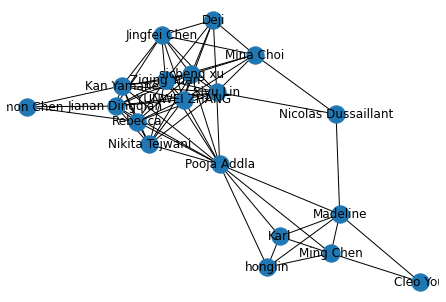

In [6]:
nx.draw(G, with_labels = True)

#Density

In [7]:
density = nx.density(G)

print('The edge density is: %.3f' % (density)) 

The edge density is: 0.415


#This value of 0.415 indicates that this network is quite well-connected 
#because we can see more than 40% links among all possible links. This is going to be harder and harder as the network size gets bigger.

#Degree Centrality

In [8]:
degree = nx.degree(G)
degree

DegreeView({'Nicolas Dussaillant': 3, 'Ming Chen': 5, 'Rebecca': 9, 'Nikita Tejwani': 8, 'Simon Chen': 3, 'Pooja Addla': 12, 'honglin': 4, 'Karl': 4, 'sicheng xu': 11, 'Jianan Dingqian': 10, 'Siyu Lin': 12, 'Ziqing Yuan': 11, 'Jingfei Chen': 8, 'Mina Choi': 7, 'Cleo You': 2, 'Deji': 6, 'Kan Yamane': 10, 'YUNWEI ZHANG': 11, 'Madeline': 6})

In [9]:
pd.DataFrame(degree)

,0,1
0,Nicolas Dussaillant,3
1,Ming Chen,5
2,Rebecca,9
3,Nikita Tejwani,8
4,Simon Chen,3
5,Pooja Addla,12
6,honglin,4
7,Karl,4
8,sicheng xu,11
9,Jianan Dingqian,10


#Closeness centrality

In [10]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index') 

,0
Nicolas Dussaillant,0.529412
Ming Chen,0.514286
Rebecca,0.642857
Nikita Tejwani,0.620690
Simon Chen,0.428571
Pooja Addla,0.750000
honglin,0.500000
Karl,0.500000
sicheng xu,0.692308
Jianan Dingqian,0.666667


#Betweenness centrality

#Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. 

In [11]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Nicolas Dussaillant,0.028494
Ming Chen,0.043542
Rebecca,0.029879
Nikita Tejwani,0.000000
Simon Chen,0.000000
Pooja Addla,0.363663
honglin,0.000000
Karl,0.000000
sicheng xu,0.037340
Jianan Dingqian,0.042367


#Community detection

In [48]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print(len(c))

2


In [49]:

community_0 = sorted(c[0])
community_1 = sorted(c[1])

print(community_0)
print(community_1)

['Deji', 'Jianan Dingqian', 'Jingfei Chen', 'Kan Yamane', 'Mina Choi', 'Nicolas Dussaillant', 'Nikita Tejwani', 'Rebecca', 'Simon Chen', 'Siyu Lin', 'YUNWEI ZHANG', 'Ziqing Yuan', 'sicheng xu']
['Cleo You', 'Karl', 'Madeline', 'Ming Chen', 'Pooja Addla', 'honglin']


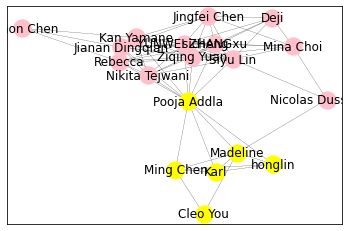

In [51]:
# Obtain the positions of the nodes
pos = nx.spring_layout(G)

# Print out all the nodes with color
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='pink', label = True)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_1, node_color='yellow', label = True)

# Print out the edges
nx.draw_networkx_edges(G, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

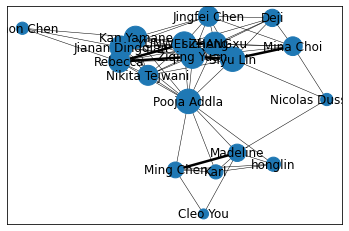

In [52]:
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 50 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()

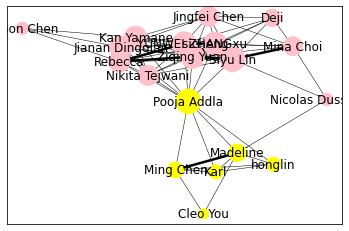

In [53]:
# Degrees of each community
community_0_degree = {c: dict(degree)[c] for c in community_0}
community_1_degree = {c: dict(degree)[c] for c in community_1}

# Print out the nodes with color and size
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='pink',
                       node_size = [v * 50 for v in community_0_degree.values()],
                       label = True)

nx.draw_networkx_nodes(G, pos = pos,
                       nodelist=community_1,
                       node_size = [v * 50 for v in community_1_degree.values()],
                       node_color='yellow', label = True)


# Print out the edges with proper width
nx.draw_networkx_edges(G,pos, width = [5**e/10 for e in eWeight.values()])

# Make sure the label is printed
nx.draw_networkx_labels(G, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()